In [1]:
### Import packages... ###

import numpy as np
import os

# Constants...
from scipy.constants import Boltzmann as kB
from scipy.constants import Rydberg as Ry
from scipy.constants import elementary_charge as qe
from scipy.constants import electron_mass as me
from scipy.constants import speed_of_light as c_spd
from scipy.constants import Planck as hp
from scipy.constants import physical_constants
rB = physical_constants['Bohr radius'][0]

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy.integrate import solve_ivp


# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.getcwd()+'/../../../../../'

In [2]:
data_folder = WORKSPACE_PATH + "/ROMNet/romnet/database/PlasmaSyst/cross_section_data/"

# Theory.

**Reaction Mechanism:**

\begin{aligned} 
Ar + e^{-} &\rightleftharpoons Ar^{4s} + e^{-}  \ \ (\text{Excitation from ground state to 4s excited state}) \\
Ar + e^{-} &\rightleftharpoons Ar^{4p} + e^{-}  \ \ (\text{Excitation from ground state to 4p excited state}) \\
Ar^{4s} + e^{-} &\rightleftharpoons Ar^{4p} + e^{-}  \ \ (\text{Excitation from 4s excited state to 4p excited state}) \\
Ar + e^{-} &\longrightarrow Ar^{+} + 2e^{-} \ \ (\text{Ionization from ground state}) \\
Ar^{4s} + e^{-} &\longrightarrow Ar^{+} + 2e^{-} \ \ (\text{Ionization from 4s excited state}) \\
Ar^{4p} + e^{-} &\longrightarrow Ar^{+} + 2e^{-} \ \ (\text{Ionization from 4p excited state}) \\
\end{aligned}

**Dynamical System:**

\begin{aligned}
\dot{c}_{Ar} &= - k_{e,f}^{4s}{c}_{Ar}{c}_{e} +  k_{e,b}^{4s}{c}_{Ar^{4s}}{c}_{e} - k_{e,f}^{4p}{c}_{Ar^{4p}}{c}_{e}
+ k_{e,b}^{4p}{c}_{Ar^{4p}}{c}_{e} - k_i{c}_{Ar}{c}_{e}\\ 
\dot{c}_{Ar^{+}} &= k_i{c}_{Ar}{c}_{e} + k_i^{4s}{c}_{Ar^{4s}}{c}_{e} + k_i^{4p}{c}_{Ar^{4p}}{c}_{e} \\
\dot{c}_{Ar^{4s}} &= k_{e,f}^{4s}{c}_{Ar}{c}_{e} - k_{e,b}^{4s}{c}_{Ar^{4s}}{c}_{e} - k_{e,f}^{4s4p}{c}_{Ar^{4s}}{c}_{e} + k_{e,b}^{4s4p}{c}_{Ar^{4p}}{c}_{e} - k_i^{4s}{c}_{Ar^{4s}}{c}_{e}\\
\dot{c}_{Ar^{4p}} &= k_{e,f}^{4p}{c}_{Ar}{c}_{e} - k_{e,b}^{4p}{c}_{Ar^{4p}}{c}_{e} + k_{e,f}^{4s4p}{c}_{Ar^{4s}}{c}_{e} - k_{e,b}^{4s4p}{c}_{Ar^{4p}}{c}_{e} - k_i^{4p}{c}_{Ar^{4p}}{c}_{e} \\
\dot{c}_{e} &= k_i{c}_{Ar}{c}_{e} + k_i^{4s}{c}_{Ar^{4s}}{c}_{e} + k_i^{4p}{c}_{Ar^{4p}}{c}_{e} \\
\end{aligned}

**Electron Energy Distribution Function:**

$$ f(\epsilon) = \frac{3\sqrt{3}}{\sqrt{2\pi}}\phi^{-3/2}\exp\left(-\frac{3}{2}\frac{\epsilon}{\phi}\right) $$

**Reaction Rate Constants:**

$$ k = \sqrt{\frac{2q_e}{m_e}}\int_{0}^{\infty} \epsilon \sigma(\epsilon)f(\epsilon) \ d\epsilon $$

# Table of reactions.


\begin{aligned}
&\text {Table 1. Table of excitation reactions.}\\
&\begin{array}{|c|c|c|c|c|}
\hline 
\hline 
\text {Reaction} & \text {Configuration} & \Delta E \ (eV) & g_l & g_u \\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4s} + e^{-} & 1s_5 & 11.548 & 1 & 5\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4s} + e^{-} & 1s_4 & 11.623 & 1 & 3\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4s} + e^{-} & 1s_3 & 11.723 & 1 &  1\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4s} + e^{-} & 1s_2 & 11.828 & 1 & 3\\
\hline
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_{10} & 12.907 & 1 & 3\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_9 & 13.076 & 1 & 7\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_8 & 13.095 & 1 &  5\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_7 & 13.153 & 1 & 3\\
\hline
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_6 & 13.172 & 1 & 5\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_5 & 13.273 & 1 & 1\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_4 & 13.283 & 1 &  3\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_3 & 13.302 & 1 & 5\\
\hline
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_2 & 13.328 & 1 & 3\\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & 2p_1 & 13.480 & 1 & 1\\
\hline 
Ar^{4s} + e^{-} \rightleftharpoons Ar^{4p} + e^{-} & NA & 1.519 & 12 & 36\\
\hline
\end{array}
\end{aligned}

\begin{aligned}
&\text {Table 1. Table of ionization reactions.}\\
&\begin{array}{|c|c|}
\hline 
\hline 
\text {Reaction} & \Delta E  \ (eV) \\
\hline 
Ar + e^{-} \rightleftharpoons Ar^{+} + 2e^{-} & 15.760 \\
\hline 
Ar^{4s} + e^{-} \rightleftharpoons Ar^{+} + 2e^{-} & 4.167 \\
\hline 
Ar^{4p} + e^{-} \rightleftharpoons Ar^{+} + 2e^{-} & 2.648 \\
\hline
\hline
\end{array}
\end{aligned}


In [3]:
### Drawin's formula for ionization. ###

def Drawin_ion(e, ei, xi, params):
    
    ei_H = hp*c_spd*Ry/qe # Ionization energy of Hydrogen (eV).
    u = e/ei 
    [alpha, beta] = params
    sigma = (1.0e+12)*4.0*np.pi*((rB*ei_H/ei)**2.0)*xi*alpha*(u**(-2.0))*(u - 1.0)*np.log(1.25*beta*u)
    
    return sigma

#----------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------

### Drawin's formula for excitation. ###

def Drawin_exc(e, ei, params):
    
    ei_H = hp*c_spd*Ry/qe # Ionization energy of Hydrogen (eV).
    u = e/ei
    
    if (params[-1] == 'A'): # For optically allowed transitions.
        sigma = 4.0*np.pi*((rB*ei_H/ei)**2.0)*params[0]*(u**(-2.0))*(u - 1.0)*np.log(1.25*params[1]*u)
        
    elif (params[-1] == 'S'): # For spin-forbidden transitions.
        sigma = 4.0*np.pi*(rB**2.0)*params[0]*(u**(-3.0))*(1.0 - 1.0/(u**2.0))
    
    elif (params[-1] == 'P'): # For parity-forbidden transitions.
        sigma = 4.0*np.pi*(rB**2.0)*params[0]*(u**(-1.0))*(1.0 - 1.0/u)
    
    else:
        print('Unsupported transition type.')
    
    return (1.0e+12)*sigma

#----------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------

### Vriens' formula for ionization. ###

def Vriens_ion(e, ei):
    
    u = e/ei
    ei_H = hp*c_spd*Ry/qe # Ionization energy of Hydrogen (eV).
    sigma = (1.0e+12)*4.0*np.pi*((rB*ei_H/ei)**2.0)*(5.0/3.0 - 1.0/u - (2.0/3.0)*(1.0/(u**2.0)))/(3.25 + u)
    
    return sigma

In [4]:
### Functions... ###

# Function convolving cross-section with electron energy distribution function (EEDF) (For forward rates).
def cs2rate_fwd(cs, e, e_t, phi):

    # Shift the energy grid by the energy treshold.
    ne = len(e)
    for i in range(ne):
        
        if (e_t < e[i]):
            break
    
    # Linear interpolation to get the cross-section corresponding to the energy treshold.
    cs_t = (e_t - e[i-1])*(cs[i] - cs[i-1])/(e[i] - e[i-1]) + cs[i-1]
    
    # Update energy and cross section grids.
    e_new = np.concatenate(([e_t], e[i:]), axis=0)
    cs_new = np.concatenate(([cs_t], cs[i:]), axis=0)
    
    g = np.sqrt(2.0*qe/me) # Gamma parameter.
    F =  (3.0*np.sqrt(3.0)/np.sqrt(2.0*np.pi))*(phi**(-1.5))*np.exp(-1.5*e_new/phi) # EEDF.
    G = e_new*cs_new*F # Convolution.
    
    return g*np.trapz(G, e_new)

# Function convolving cross-section with electron energy distribution function (EEDF) (For backward rates).
def cs2rate_bwd(cs, e, e_t, phi, gl, gu):

    # Shift the energy grid by the energy treshold.
    ne = len(e)
    for i in range(ne):
        
        if (e_t > (1e-14 + e[i])):
            break
    
    # Linear interpolation to get the cross-section corresponding to energy treshold.
    cs_t = (e_t - e[i-1])*(cs[i] - cs[i-1])/(e[i] - e[i-1]) + cs[i-1]
    
    # Update energy and cross section grids.
    e_new = np.concatenate(([e_t], e[i:]), axis=0)
    cs_new = np.concatenate(([cs_t], cs[i:]), axis=0)
    
    g = np.sqrt(2.0*qe/me) # Gamma parameter.
    F =  (3.0*np.sqrt(3.0)/np.sqrt(2.0*np.pi))*(phi**(-1.5))*np.exp(-1.5*(e_new - e_t)/phi) # EEDF.
    G = e_new*cs_new*F # Convolution.
    
    return (gl/gu)*g*np.trapz(G, e_new)

# Right hand side of the ODE modeling the 0D plasma reactor.
def ZeroD_RHS(t, X, k):
    
    [ki_gs, ki_4s, ki_4p, kef_4s, keb_4s, kef_4p, keb_4p, kef_4s4p, keb_4s4p] = k
    
    Ce_dot = ki_gs*X[0]*X[1] + ki_4s*X[0]*X[3] + ki_4p*X[0]*X[4]
    CAr_dot = -kef_4s*X[0]*X[1] + keb_4s*X[0]*X[3] - kef_4p*X[0]*X[1] + keb_4p*X[0]*X[4] - ki_gs*X[0]*X[1]
    CArp_dot = ki_gs*X[0]*X[1] + ki_4s*X[0]*X[3] + ki_4p*X[0]*X[4]
    CAr4s_dot = kef_4s*X[0]*X[1] - keb_4s*X[0]*X[3] - kef_4s4p*X[0]*X[3] + keb_4s4p*X[0]*X[4] - ki_4s*X[0]*X[3]
    CAr4p_dot = kef_4p*X[0]*X[1] - keb_4p*X[0]*X[4] + kef_4s4p*X[0]*X[3] - keb_4s4p*X[0]*X[4] - ki_4p*X[0]*X[4]
    
    return [Ce_dot, CAr_dot, CArp_dot, CAr4s_dot, CAr4p_dot]

# Function for the numerical solution of the 0D plasma reactor.
def ODE_solution_numerical(X0, k, tVec):
    
    rtol = 1.e-12 # Relative tolerance for the stiff solver.
    atol = 1.e-12 # Absolute tolerance for the stiff solver.
    
    RHS = lambda t, X : ZeroD_RHS(t, X, k)
    
    output = solve_ivp(RHS, (tVec[0],tVec[-1]), X0, method = 'BDF', t_eval = tVec, rtol = rtol, 
                       atol = atol)
    return output.y

In [5]:
### Get experimental cross-section data for non-relativistic Ar reactions from different sources. 
### (J -> eV, m^2 -> nm^2)

## Ionization from ground-state. ##

# Hayashi. #
data_ion_gs_Hayashi = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_single_ionization_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]

# BSR-500. #
data_ion_gs_BSR500 = np.loadtxt(data_folder+"/Ar/BSR-500/non-relativistic/e+Ar_single_ionization_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]

#----------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------

## Excitation from ground-state to 4s. ##

# Hayashi. #
data_exc_1s5_Hayashi = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_11.55eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_1s4_Hayashi = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_11.62eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_1s3_Hayashi = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_11.72eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_1s2_Hayashi = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_11.83eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]

# BSR-500. #
data_exc_1s5_BSR500 = np.loadtxt(data_folder+"/Ar/BSR-500/non-relativistic/e+Ar_excitation_11.55eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_1s4_BSR500 = np.loadtxt(data_folder+"/Ar/BSR-500/non-relativistic/e+Ar_excitation_11.62eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_1s3_BSR500 = np.loadtxt(data_folder+"/Ar/BSR-500/non-relativistic/e+Ar_excitation_11.72eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_1s2_BSR500 = np.loadtxt(data_folder+"/Ar/BSR-500/non-relativistic/e+Ar_excitation_11.83eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]

#----------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------

## Excitation from ground-state to 4p. ##

# Hayashi. #
data_exc_2p10_Hayashi = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_12.91eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p9_Hayashi  = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_13.08eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p8_Hayashi  = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_13.09eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p7_Hayashi  = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_13.15eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p6_Hayashi  = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_13.17eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p5_Hayashi  = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_13.27eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p3_Hayashi  = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_13.30eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p2_Hayashi  = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_13.33eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p1_Hayashi  = np.loadtxt(data_folder+"/Ar/Hayashi/non-relativistic/e+Ar_excitation_13.48eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]

# BSR-500. #
data_exc_2p4_BSR500   = np.loadtxt(data_folder+"/Ar/BSR-500/non-relativistic/e+Ar_excitation_13.28eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]
data_exc_2p3_BSR500   = np.loadtxt(data_folder+"/Ar/BSR-500/non-relativistic/e+Ar_excitation_13.30eV_SI.data", delimiter='\t')*[1.0/qe, (1.00e+12)]

#----------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------

### Make a library for cross-sections. ###

Hayashi = {'ion': {'gs': data_ion_gs_Hayashi}, 
           'exc': {'1s5': data_exc_1s5_Hayashi,
                   '1s4': data_exc_1s4_Hayashi,
                   '1s3': data_exc_1s3_Hayashi,
                   '1s2': data_exc_1s2_Hayashi,
                   '2p10': data_exc_2p10_Hayashi,
                   '2p9': data_exc_2p9_Hayashi,
                   '2p8': data_exc_2p8_Hayashi,
                   '2p7': data_exc_2p7_Hayashi,
                   '2p6': data_exc_2p6_Hayashi,
                   '2p5': data_exc_2p5_Hayashi,
                   '2p3': data_exc_2p3_Hayashi,
                   '2p2': data_exc_2p2_Hayashi,
                   '2p1': data_exc_2p1_Hayashi}}

BSR500 = {'ion': {'gs': data_ion_gs_BSR500}, 
           'exc': {'1s5': data_exc_1s5_BSR500,
                   '1s4': data_exc_1s4_BSR500,
                   '1s3': data_exc_1s3_BSR500,
                   '1s2': data_exc_1s2_BSR500,
                   '2p4': data_exc_2p4_BSR500,
                   '2p3': data_exc_2p3_BSR500}}

#----------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------

### Make a library for ionization and excitation energies (eV). ###

Energies = {'ion': {'gs': 15.760, '4s': 4.167, '4p': 2.648},
            'exc': {'gs4s': {'1s5': 11.548, '1s4': 11.623, '1s3': 11.723, '1s2': 11.828},
                    'gs4p': {'2p10': 12.907, '2p9': 13.076, '2p8': 13.095, '2p7': 13.153, '2p6': 13.172,
                             '2p5': 13.273, '2p4': 13.283, '2p3': 13.302, '2p2': 13.328, '2p1': 13.480},  
                    '4s4p': {'p': 1.519}}}

#----------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------

### Make a library for ionization and excitation energies (eV). ###

Weights = {'gs': 1.0, '1s5': 5.0, '1s4': 3.0, '1s3': 1.0, '1s2': 3.0,
           '2p10': 3.0, '2p9': 7.0, '2p8': 5.0, '2p7': 3.0, '2p6': 5.0,
           '2p5': 1.0, '2p4': 3.0, '2p3': 5.0, '2p2': 3.0, '2p1': 1.0,}

# Ionization cross-sections.

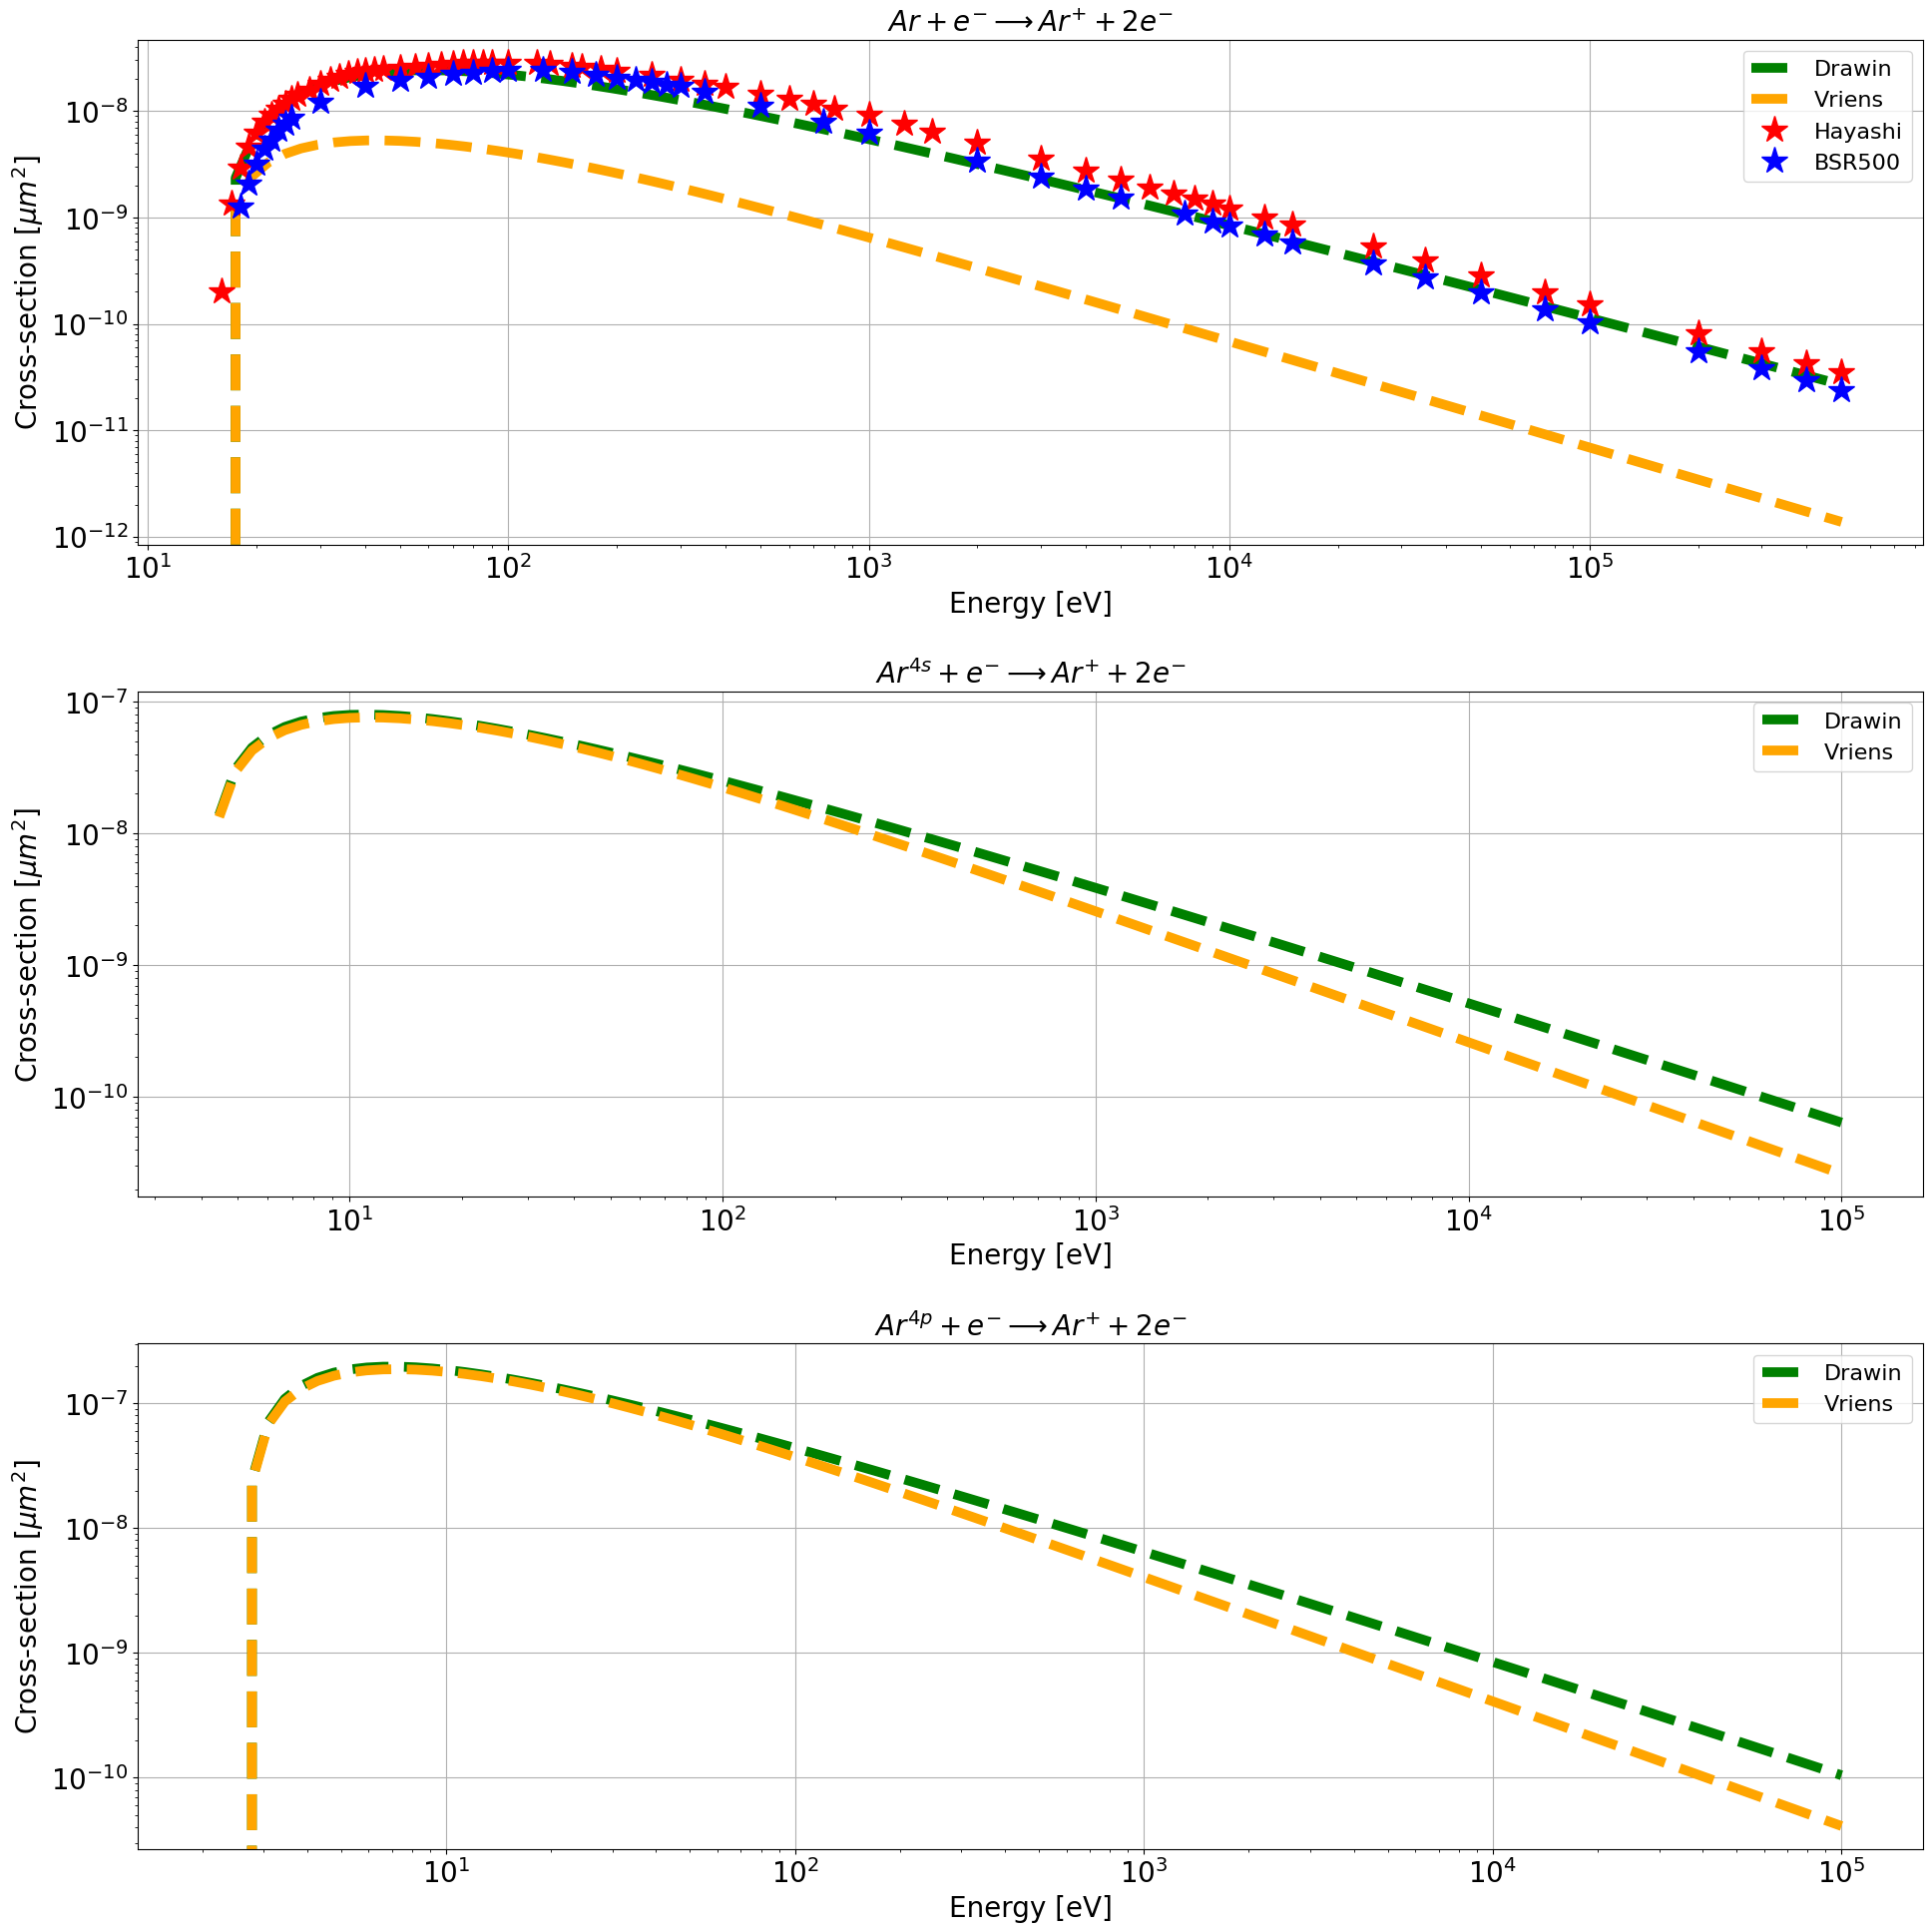

In [6]:
### Plotting cross-section curves of ionization reactions... ###

fig, axes = plt.subplots(nrows = 3, figsize = (20,20))

#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

# Ionization from ground state.

e_grid           = np.logspace(np.log10(Hayashi['ion']['gs'][1,0]), np.log10(Hayashi['ion']['gs'][-1, 0]), 100)
cs_Drawin_ion_gs = Drawin_ion(e_grid, Energies['ion']['gs'], 6.0, [0.51, 1.0])
cs_Vriens_ion_gs = Vriens_ion(e_grid, Energies['ion']['gs'])

ax = axes[0]
ax.loglog(e_grid, cs_Drawin_ion_gs, '--', color = 'green', label = 'Drawin', lw = 7.0)
ax.loglog(e_grid, cs_Vriens_ion_gs, '--', color = 'orange', label = 'Vriens', lw = 7.0)
ax.loglog(Hayashi['ion']['gs'][:,0], Hayashi['ion']['gs'][:,1], '*', color = 'red', label = 'Hayashi', lw = 7.0, ms = 20.0)
ax.loglog(BSR500['ion']['gs'][:,0], BSR500['ion']['gs'][:,1], '*', color = 'blue', label = 'BSR500', lw = 7.0, ms = 20.0)
ax.set_title('$Ar + e^{-} \longrightarrow  Ar^{+} + 2e^{-}$', fontsize = 20)
ax.set_xlabel('Energy [eV]', fontsize = 20)
ax.set_ylabel('Cross-section [$\mu m^2$]', fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.legend(loc='upper right', fontsize='16')
ax.grid()

#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

# Ionization from 4s excited state.

e_grid           = np.logspace(0.65, 5.0, 100)
cs_Drawin_ion_4s = Drawin_ion(e_grid, Energies['ion']['4s'], 1.0, [0.35, 4.0])
cs_Vriens_ion_4s = Vriens_ion(e_grid, Energies['ion']['4s'])

ax = axes[1]
ax.loglog(e_grid, cs_Drawin_ion_4s, '--', color = 'green', label = 'Drawin', lw = 7.0)
ax.loglog(e_grid, cs_Vriens_ion_4s, '--', color = 'orange', label = 'Vriens', lw = 7.0)
ax.set_title('$Ar^{4s} + e^{-} \longrightarrow  Ar^{+} + 2e^{-}$', fontsize = 20)
ax.set_xlabel('Energy [eV]', fontsize = 20)
ax.set_ylabel('Cross-section [$\mu m^2$]', fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.legend(loc='upper right', fontsize='16')
ax.grid()

#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

# Ionization from 4p excited state.

e_grid           = np.logspace(0.35, 5.0, 100)
cs_Drawin_ion_4p = Drawin_ion(e_grid, Energies['ion']['4p'], 1.0, [0.35, 4.0])
cs_Vriens_ion_4p = Vriens_ion(e_grid, Energies['ion']['4p'])

ax = axes[2]
ax.loglog(e_grid, cs_Drawin_ion_4p, '--', color = 'green', label = 'Drawin', lw = 7.0)
ax.loglog(e_grid, cs_Vriens_ion_4p, '--', color = 'orange', label = 'Vriens', lw = 7.0)
ax.set_title('$Ar^{4p} + e^{-} \longrightarrow  Ar^{+} + 2e^{-}$', fontsize = 20)
ax.set_xlabel('Energy [eV]', fontsize = 20)
ax.set_ylabel('Cross-section [$\mu m^2$]', fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.legend(loc='upper right', fontsize='16')
ax.grid()

fig.tight_layout(pad = 3.0)

# Excitation cross-sections.

## Ground state to 4s excitations...

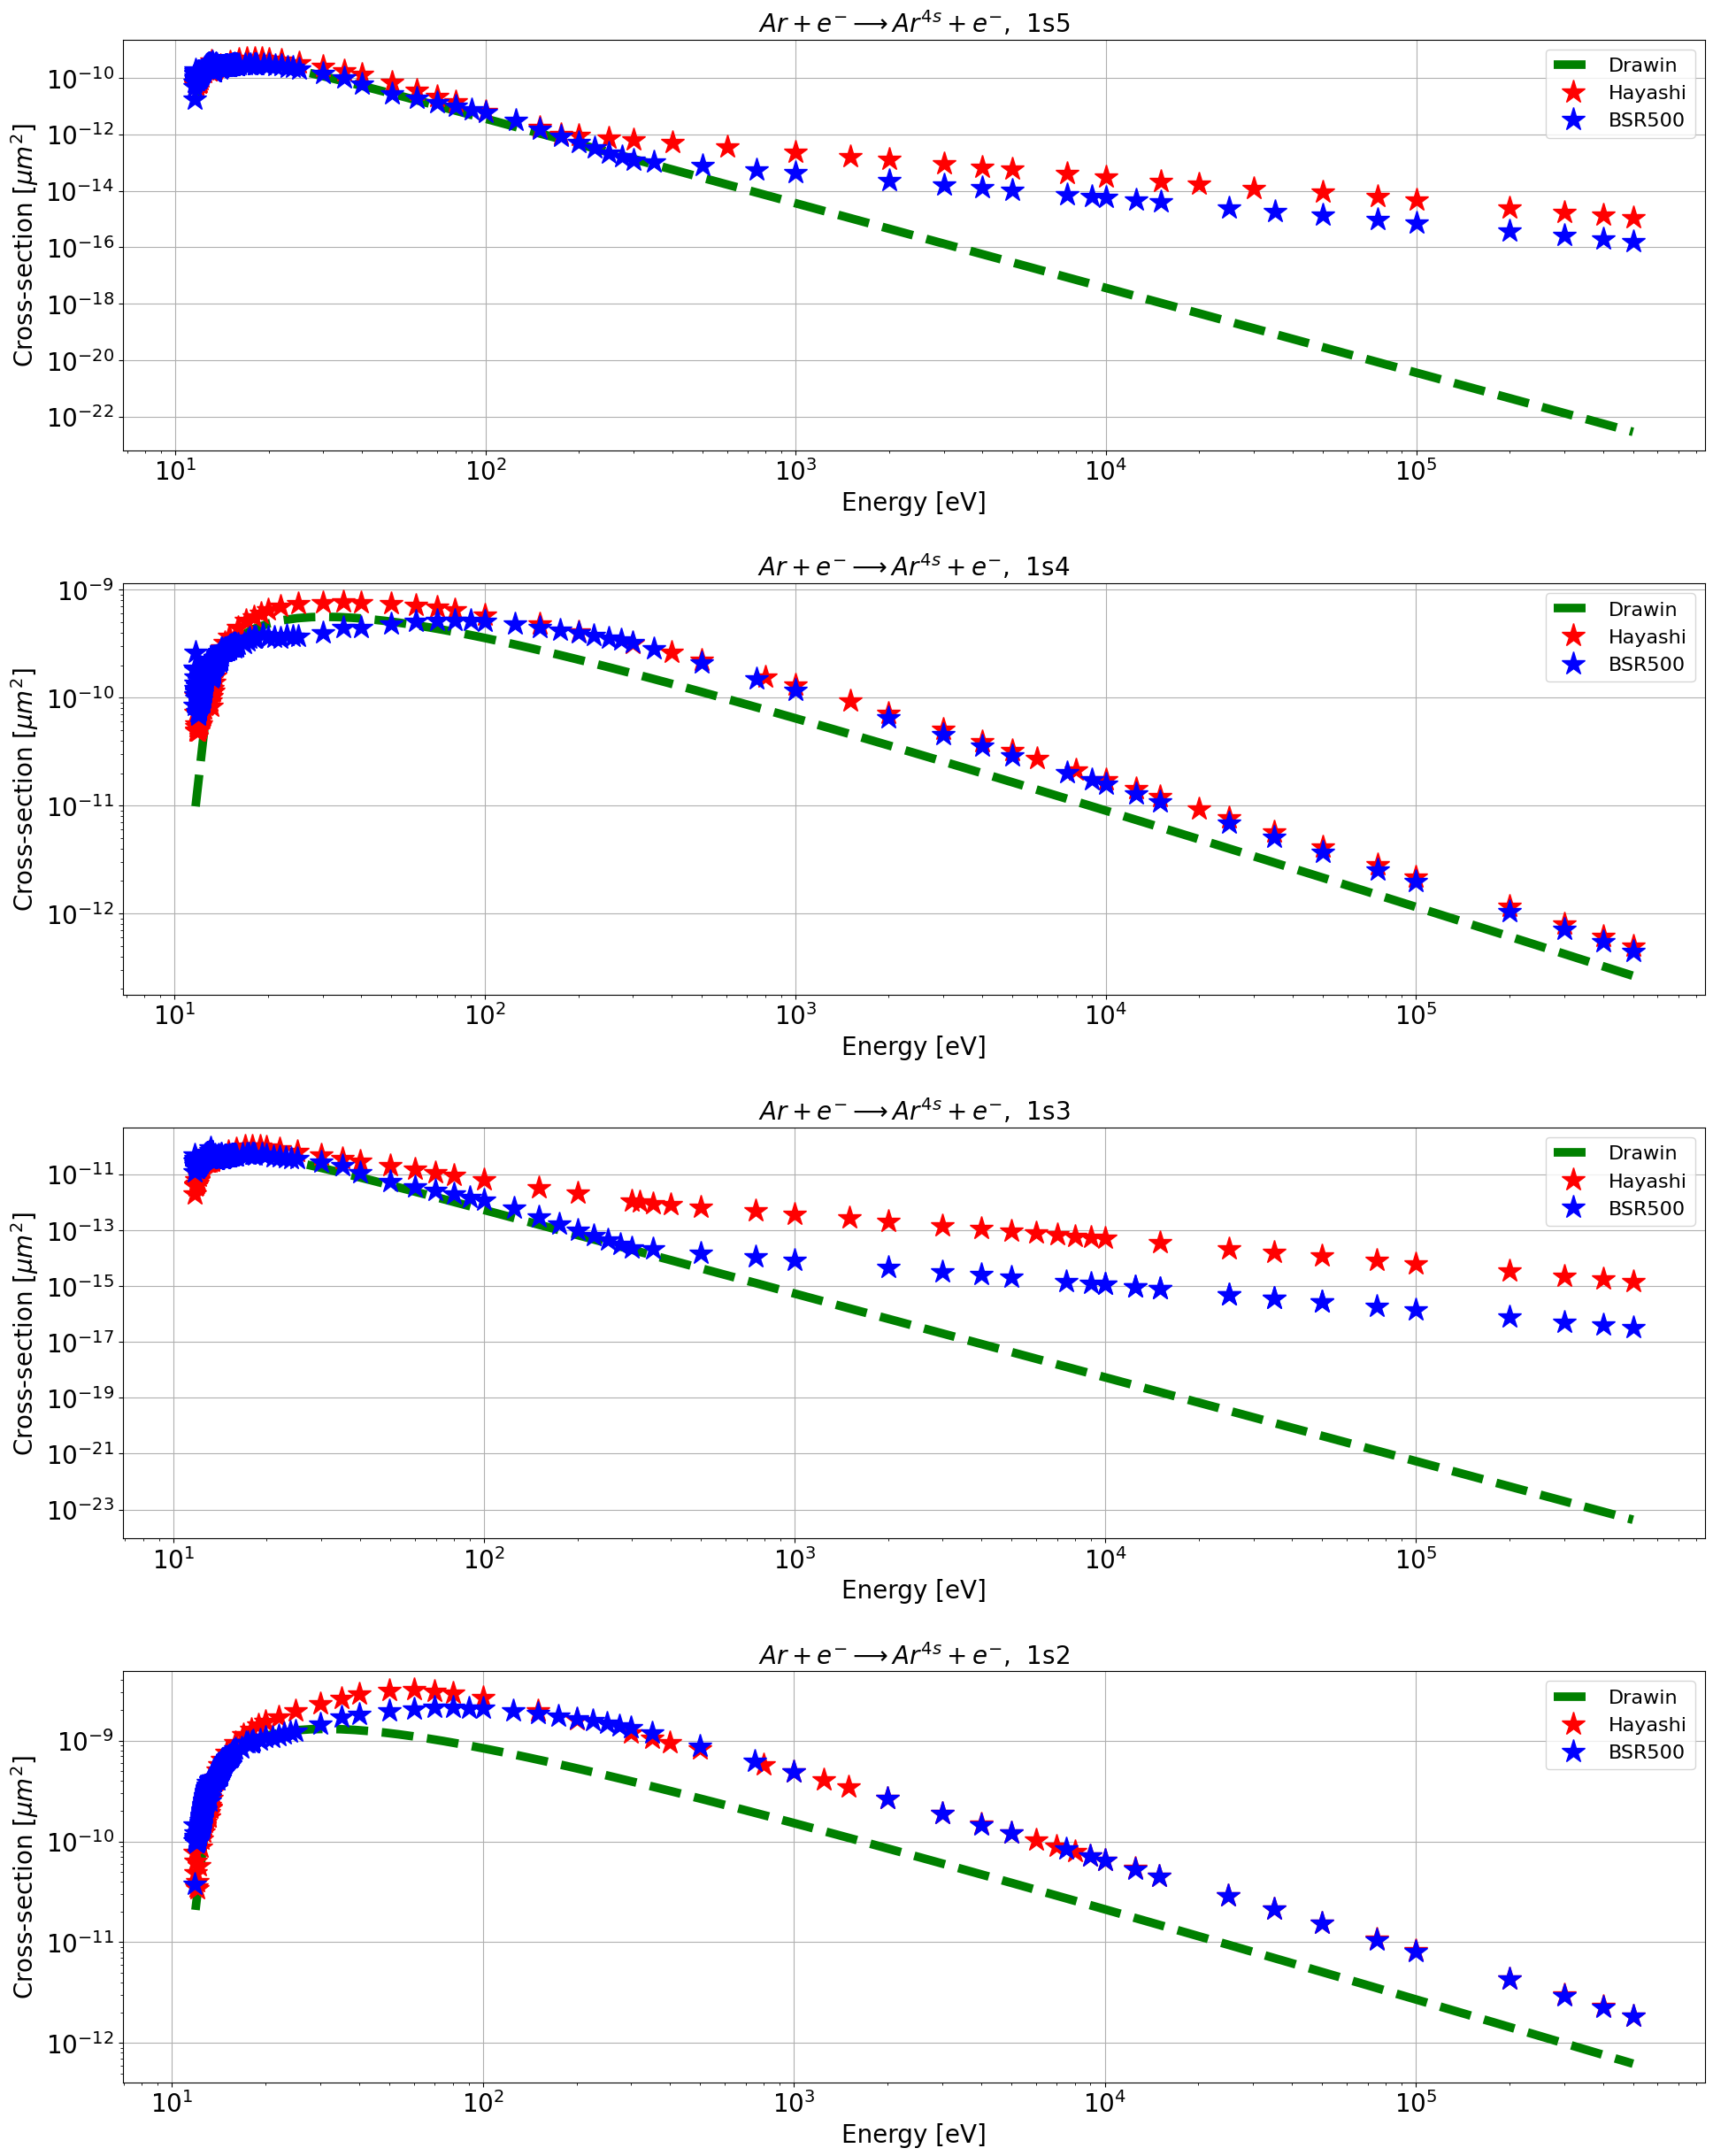

In [7]:
### Plotting cross-section curves of 4s-excitation reactions... ###

fig, axes = plt.subplots(nrows = 4, figsize = (20,25))

params_lib = {'1s5': [6.7*1.0e-2,'S'], 
              '1s4': [1.92*1.0e-2, 4.0, 'A'], 
              '1s3': [9.5*1.0e-3, 'S'], 
              '1s2': [4.62*1.0e-2, 4.0, 'A']}

for i, r in enumerate(['1s5', '1s4', '1s3', '1s2']):

    ax = axes[i]
    
    e_grid        = np.logspace(np.log10(Hayashi['exc'][r][3,0]), np.log10(Hayashi['exc'][r][-1,0]), 100)
    cs_Drawin_exc = Drawin_exc(e_grid, Energies['exc']['gs4s'][r], params_lib[r][:])
    
    ax.loglog(e_grid, cs_Drawin_exc, '--', color = 'green', label = 'Drawin', lw = 7.0)
    ax.loglog(Hayashi['exc'][r][:,0], Hayashi['exc'][r][:,1], '*', color = 'red', label = 'Hayashi', lw = 7.0, ms = 20.0)
    ax.loglog(BSR500['exc'][r][:,0], BSR500['exc'][r][:,1], '*', color = 'blue', label = 'BSR500',   lw = 7.0, ms = 20.0)
        
    ax.set_title(f'$Ar + e^{{-}} \longrightarrow  Ar^{{4s}} + e^{{-}}$,  {r}', fontsize = 20)
    ax.set_xlabel('Energy [eV]', fontsize = 20)
    ax.set_ylabel('Cross-section [$\mu m^2$]', fontsize = 20)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.legend(loc='upper right', fontsize='16')
    ax.grid()


fig.tight_layout(pad = 3.0)

## Ground state to 4p excitations...

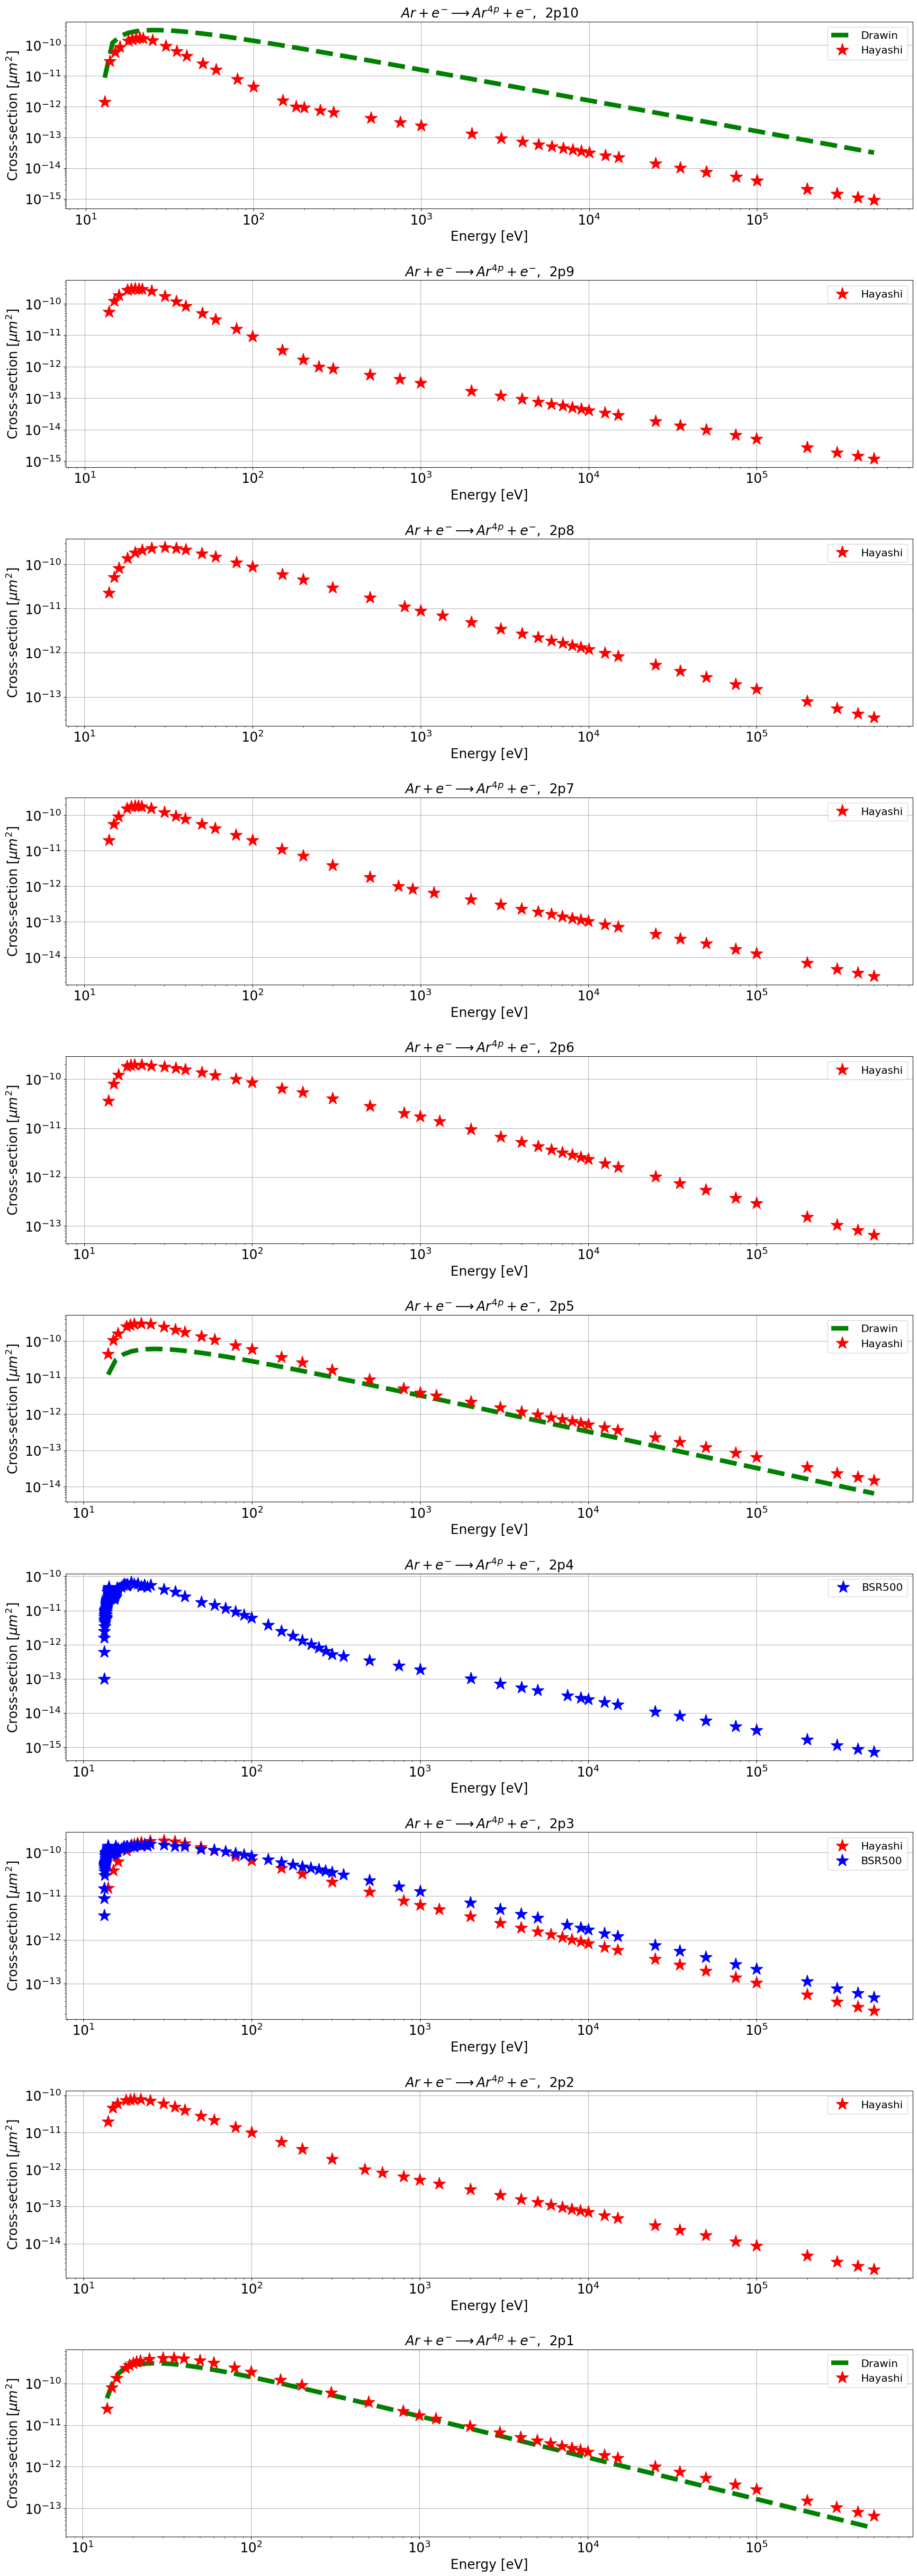

In [8]:
### Plotting cross-section curves of 4p-excitation reactions... ###

fig, axes = plt.subplots(nrows = 10, figsize = (20,55))

params_lib = {'2p10': [3.5*1.0e-2,'P'], 
              '2p5': [7.0*1.0e-3, 'P'], 
              '2p1': [3.5*1.0e-2, 'P']}

for i, r in enumerate(['2p10', '2p9', '2p8', '2p7', '2p6', '2p5', '2p4', '2p3', '2p2', '2p1']):

    ax = axes[i]
    
    if (r in ('2p10', '2p5', '2p1')):
        
        e_grid = np.logspace(np.log10(Hayashi['exc'][r][2,0]), np.log10(Hayashi['exc'][r][-1,0]), 100)
        cs_Drawin_exc = Drawin_exc(e_grid, Energies['exc']['gs4p'][r], params_lib[r][:])
        ax.loglog(e_grid, cs_Drawin_exc, '--', color = 'green', label = 'Drawin', lw = 7.0)
    
    if (r != '2p4'):
        ax.loglog(Hayashi['exc'][r][:,0], Hayashi['exc'][r][:,1], '*', color = 'red', label = 'Hayashi', 
                   lw = 7.0, ms = 20.0)
    if (r in ('2p4', '2p3')):    
        ax.loglog(BSR500['exc'][r][:,0], BSR500['exc'][r][:,1], '*', color = 'blue', label = 'BSR500', 
                   lw = 7.0, ms = 20.0)
        
    ax.set_title(f'$Ar + e^{{-}} \longrightarrow  Ar^{{4p}} + e^{{-}}$,  {r}', fontsize = 20)
    ax.set_xlabel('Energy [eV]', fontsize = 20)
    ax.set_ylabel('Cross-section [$\mu m^2$]', fontsize = 20)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.legend(loc='upper right', fontsize='16')
    ax.grid()


fig.tight_layout(pad = 3.0)

## 4s to 4p excitation...

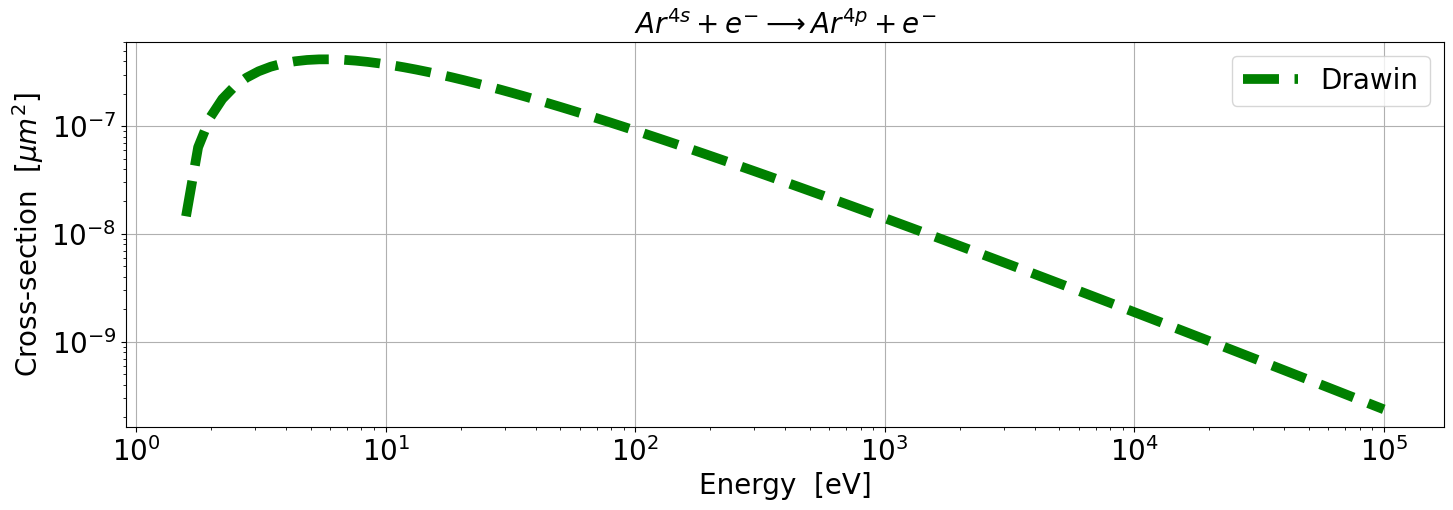

In [9]:
### Plotting cross-section curves of 4s4p-excitation reactions... ###

e_grid        = np.logspace(0.2, 5.0, 100)
cs_Drawin_exc = Drawin_exc(e_grid, Energies['exc']['4s4p']['p'], [0.488, 1.0, 'A'])

plt.figure(figsize=(17,5)) 
plt.loglog(e_grid, cs_Drawin_exc, '--', color = 'green', label = 'Drawin', lw = 7.0)

plt.title('$Ar^{4s} + e^{-} \longrightarrow  Ar^{4p} + e^{-}$', fontsize = 20)
plt.xlabel('Energy  [eV]', fontsize = 20)
plt.ylabel('Cross-section  [$\mu m^2$]', fontsize = 20)
plt.legend(loc='upper right', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()
plt.show()

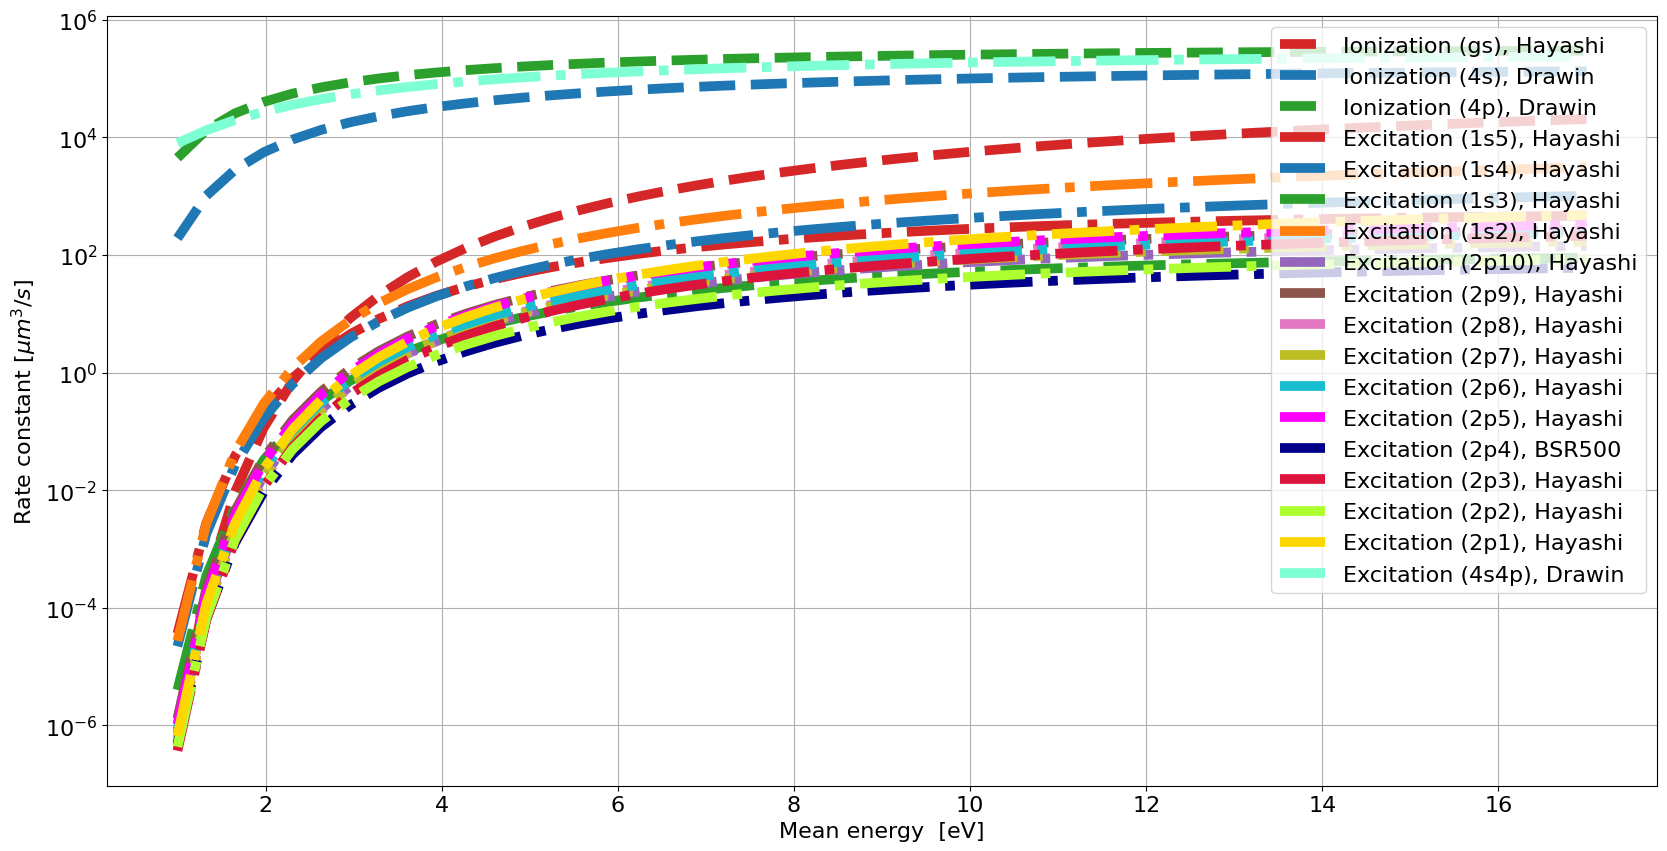

In [10]:
### Plot forward rate constants vs. mean electron energy. ###

e_mean_grid = np.linspace(1.0, 17.0, 50) # Mean electron energy grid.

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_ion_gs_grid = [cs2rate_fwd(Hayashi['ion']['gs'][:,1], Hayashi['ion']['gs'][:,0], Energies['ion']['gs'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

e_grid           = np.logspace(np.log10(Energies['ion']['4s']), 5.0, 100)
cs_Drawin_ion_4s = Drawin_ion(e_grid, Energies['ion']['4s'], 1.0, [0.35, 4.0])
k_ion_4s_grid    = [cs2rate_fwd(cs_Drawin_ion_4s, e_grid, Energies['ion']['4s'], e_mean)*1e+6 for e_mean in e_mean_grid]

# #---------------------------------------------------------------------------------------------------------------
# #---------------------------------------------------------------------------------------------------------------

e_grid           = np.logspace(np.log10(Energies['ion']['4p']), 5.0, 100)
cs_Drawin_ion_4p = Drawin_ion(e_grid, Energies['ion']['4p'], 1.0, [0.35, 4.0])
k_ion_4p_grid    = [cs2rate_fwd(cs_Drawin_ion_4p, e_grid, Energies['ion']['4p'], e_mean)*1e+6 for e_mean in e_mean_grid]

# #---------------------------------------------------------------------------------------------------------------
# #---------------------------------------------------------------------------------------------------------------

k_exc_1s5_grid = [cs2rate_fwd(Hayashi['exc']['1s5'][:,1], Hayashi['exc']['1s5'][:,0], Energies['exc']['gs4s']['1s5'], e_mean)*1e+6 for e_mean in e_mean_grid]

# #---------------------------------------------------------------------------------------------------------------
# #---------------------------------------------------------------------------------------------------------------

k_exc_1s4_grid =  [cs2rate_fwd(Hayashi['exc']['1s4'][:,1], Hayashi['exc']['1s4'][:,0], Energies['exc']['gs4s']['1s4'], e_mean)*1e+6 for e_mean in e_mean_grid]

# #---------------------------------------------------------------------------------------------------------------
# #---------------------------------------------------------------------------------------------------------------

k_exc_1s3_grid =  [cs2rate_fwd(Hayashi['exc']['1s3'][:,1], Hayashi['exc']['1s3'][:,0], Energies['exc']['gs4s']['1s3'], e_mean)*1e+6 for e_mean in e_mean_grid]

# #---------------------------------------------------------------------------------------------------------------
# #---------------------------------------------------------------------------------------------------------------

k_exc_1s2_grid =  [cs2rate_fwd(Hayashi['exc']['1s2'][:,1], Hayashi['exc']['1s2'][:,0], Energies['exc']['gs4s']['1s2'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p10_grid =  [cs2rate_fwd(Hayashi['exc']['2p10'][:,1], Hayashi['exc']['2p10'][:,0], Energies['exc']['gs4p']['2p10'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p9_grid =  [cs2rate_fwd(Hayashi['exc']['2p9'][:,1], Hayashi['exc']['2p9'][:,0], Energies['exc']['gs4p']['2p9'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p8_grid =  [cs2rate_fwd(Hayashi['exc']['2p8'][:,1], Hayashi['exc']['2p8'][:,0], Energies['exc']['gs4p']['2p8'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p7_grid =  [cs2rate_fwd(Hayashi['exc']['2p7'][:,1], Hayashi['exc']['2p7'][:,0], Energies['exc']['gs4p']['2p7'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p6_grid =  [cs2rate_fwd(Hayashi['exc']['2p6'][:,1], Hayashi['exc']['2p6'][:,0], Energies['exc']['gs4p']['2p6'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p5_grid =  [cs2rate_fwd(Hayashi['exc']['2p5'][:,1], Hayashi['exc']['2p5'][:,0], Energies['exc']['gs4p']['2p5'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p4_grid =  [cs2rate_fwd(BSR500['exc']['2p4'][:,1], BSR500['exc']['2p4'][:,0], Energies['exc']['gs4p']['2p4'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p3_grid =  [cs2rate_fwd(Hayashi['exc']['2p3'][:,1], Hayashi['exc']['2p3'][:,0], Energies['exc']['gs4p']['2p3'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p2_grid =  [cs2rate_fwd(Hayashi['exc']['2p2'][:,1], Hayashi['exc']['2p2'][:,0], Energies['exc']['gs4p']['2p2'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

k_exc_2p1_grid =  [cs2rate_fwd(Hayashi['exc']['2p1'][:,1], Hayashi['exc']['2p1'][:,0], Energies['exc']['gs4p']['2p1'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

e_grid          = np.logspace(np.log10(Energies['exc']['4s4p']['p']), 5.0, 1000)
cs_Drawin_exc   = Drawin_ion(e_grid, Energies['ion']['4p'], 1.0, [0.488, 1.0])
k_exc_4s4p_grid = [cs2rate_fwd(cs_Drawin_exc, e_grid, Energies['exc']['4s4p']['p'], e_mean)*1e+6 for e_mean in e_mean_grid]

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(20,10)) 
plt.semilogy(e_mean_grid, k_ion_gs_grid,'--', color = 'tab:red', label = 'Ionization (gs), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_ion_4s_grid,'--', color = 'tab:blue', label = 'Ionization (4s), Drawin', lw = 7.0)
plt.semilogy(e_mean_grid, k_ion_4p_grid,'--', color = 'tab:green', label = 'Ionization (4p), Drawin', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_1s5_grid,'-.', color = 'tab:red', label = 'Excitation (1s5), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_1s4_grid,'-.', color = 'tab:blue', label = 'Excitation (1s4), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_1s3_grid,'-.', color = 'tab:green', label = 'Excitation (1s3), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_1s2_grid,'-.', color = 'tab:orange', label = 'Excitation (1s2), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p10_grid,'-.', color = 'tab:purple', label = 'Excitation (2p10), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p9_grid,'-.', color = 'tab:brown', label = 'Excitation (2p9), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p8_grid,'-.', color = 'tab:pink', label = 'Excitation (2p8), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p7_grid,'-.', color = 'tab:olive', label = 'Excitation (2p7), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p6_grid,'-.', color = 'tab:cyan', label = 'Excitation (2p6), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p5_grid,'-.', color = 'magenta', label = 'Excitation (2p5), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p4_grid,'-.', color = 'darkblue', label = 'Excitation (2p4), BSR500', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p3_grid,'-.', color = 'crimson', label = 'Excitation (2p3), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p2_grid,'-.', color = 'greenyellow', label = 'Excitation (2p2), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_2p1_grid,'-.', color = 'gold', label = 'Excitation (2p1), Hayashi', lw = 7.0)
plt.semilogy(e_mean_grid, k_exc_4s4p_grid,'-.', color = 'aquamarine', label = 'Excitation (4s4p), Drawin', lw = 7.0)
plt.xlabel('Mean energy  [eV]', fontsize = 16)
plt.ylabel('Rate constant [$\mu m^{3}/s$]', fontsize = 16)
plt.legend(loc='upper right', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.show()


In [11]:
#### Compute reaction rate constants. ####

e_mean = 10.0 #(eV) Mean electron energy.

### Ionization reactions. ###

# Ionization from ground state.
ki_gs = cs2rate_fwd(Hayashi['ion']['gs'][:,1], Hayashi['ion']['gs'][:,0], Energies['ion']['gs'], e_mean)*1e+6

# Ionization from 4s excited state.
e_grid           = np.logspace(np.log10(Energies['ion']['4s']), 5.0, 100)
cs_Drawin_ion_4s = Drawin_ion(e_grid, Energies['ion']['4s'], 1.0, [0.35, 4.0])
ki_4s            = cs2rate_fwd(cs_Drawin_ion_4s, e_grid, Energies['ion']['4s'], e_mean)*1e+6 

# Ionization from 4p excited state.
e_grid           = np.logspace(np.log10(Energies['ion']['4p']), 5.0, 100)
cs_Drawin_ion_4p = Drawin_ion(e_grid, Energies['ion']['4p'], 1.0, [0.35, 4.0])
ki_4p            = cs2rate_fwd(cs_Drawin_ion_4p, e_grid, Energies['ion']['4p'], e_mean)*1e+6

#----------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------

### Excitation reactions. ###

# Forward reactions...

# Excitation from ground state to 4s (1s5) excited state.
kef_1s5 = cs2rate_fwd(Hayashi['exc']['1s5'][:,1], Hayashi['exc']['1s5'][:,0], Energies['exc']['gs4s']['1s5'], e_mean)*1e+6

# Excitation from ground state to 4s (1s4) excited state.
kef_1s4 = cs2rate_fwd(Hayashi['exc']['1s4'][:,1], Hayashi['exc']['1s4'][:,0], Energies['exc']['gs4s']['1s4'], e_mean)*1e+6

# Excitation from ground state to 4s (1s3) excited state.
kef_1s3 = cs2rate_fwd(Hayashi['exc']['1s3'][:,1], Hayashi['exc']['1s3'][:,0], Energies['exc']['gs4s']['1s3'], e_mean)*1e+6

# Excitation from ground state to 4s (1s2) excited state.
kef_1s2 = cs2rate_fwd(Hayashi['exc']['1s2'][:,1], Hayashi['exc']['1s2'][:,0], Energies['exc']['gs4s']['1s2'], e_mean)*1e+6

# Excitation from ground state to 4p (2p10) excited state.
kef_2p10 = cs2rate_fwd(Hayashi['exc']['2p10'][:,1], Hayashi['exc']['2p10'][:,0], Energies['exc']['gs4p']['2p10'], e_mean)*1e+6

# Excitation from ground state to 4p (2p9) excited state.
kef_2p9 = cs2rate_fwd(Hayashi['exc']['2p9'][:,1], Hayashi['exc']['2p9'][:,0], Energies['exc']['gs4p']['2p9'], e_mean)*1e+6

# Excitation from ground state to 4p (2p8) excited state.
kef_2p8 = cs2rate_fwd(Hayashi['exc']['2p8'][:,1], Hayashi['exc']['2p8'][:,0], Energies['exc']['gs4p']['2p8'], e_mean)*1e+6

# Excitation from ground state to 4p (2p7) excited state.
kef_2p7 = cs2rate_fwd(Hayashi['exc']['2p7'][:,1], Hayashi['exc']['2p7'][:,0], Energies['exc']['gs4p']['2p7'], e_mean)*1e+6

# Excitation from ground state to 4p (2p6) excited state.
kef_2p6 = cs2rate_fwd(Hayashi['exc']['2p6'][:,1], Hayashi['exc']['2p6'][:,0], Energies['exc']['gs4p']['2p6'], e_mean)*1e+6

# Excitation from ground state to 4p (2p5) excited state.
kef_2p5 = cs2rate_fwd(Hayashi['exc']['2p5'][:,1], Hayashi['exc']['2p5'][:,0], Energies['exc']['gs4p']['2p5'], e_mean)*1e+6

# Excitation from ground state to 4p (2p4) excited state.
kef_2p4 = cs2rate_fwd(BSR500['exc']['2p4'][:,1], BSR500['exc']['2p4'][:,0], Energies['exc']['gs4p']['2p4'], e_mean)*1e+6

# Excitation from ground state to 4p (2p3) excited state.
kef_2p3 = cs2rate_fwd(Hayashi['exc']['2p3'][:,1], Hayashi['exc']['2p3'][:,0], Energies['exc']['gs4p']['2p3'], e_mean)*1e+6

# Excitation from ground state to 4p (2p2) excited state.
kef_2p2 = cs2rate_fwd(Hayashi['exc']['2p2'][:,1], Hayashi['exc']['2p2'][:,0], Energies['exc']['gs4p']['2p2'], e_mean)*1e+6

# Excitation from ground state to 4p (2p1) excited state.
kef_2p1 = cs2rate_fwd(Hayashi['exc']['2p1'][:,1], Hayashi['exc']['2p1'][:,0], Energies['exc']['gs4p']['2p1'], e_mean)*1e+6

# Excitation from 4s excited state to 4p excited state.
e_grid        = np.logspace(np.log10(Energies['exc']['4s4p']['p']), 5.0, 1000)
cs_Drawin_exc = Drawin_ion(e_grid, Energies['ion']['4p'], 1.0, [0.488, 1.0])
kef_4s4p      = cs2rate_fwd(cs_Drawin_exc, e_grid, Energies['exc']['4s4p']['p'], e_mean)*1e+6 

## Backward reactions...

# De-excitation from 4s (1s5) excited state to ground state.
keb_1s5 = cs2rate_bwd(Hayashi['exc']['1s5'][:,1], Hayashi['exc']['1s5'][:,0], Energies['exc']['gs4s']['1s5'], e_mean, Weights['gs'], Weights['1s5'])*1e+6

# De-excitation from 4s (1s4) excited state to ground state.
keb_1s4 = cs2rate_bwd(Hayashi['exc']['1s4'][:,1], Hayashi['exc']['1s4'][:,0], Energies['exc']['gs4s']['1s4'], e_mean, Weights['gs'], Weights['1s4'])*1e+6

# De-excitation from 4s (1s3) excited state to ground state.
keb_1s3 = cs2rate_bwd(Hayashi['exc']['1s3'][:,1], Hayashi['exc']['1s3'][:,0], Energies['exc']['gs4s']['1s3'], e_mean, Weights['gs'], Weights['1s3'])*1e+6

# De-excitation from 4s (1s2) excited state to ground state.
keb_1s2 = cs2rate_bwd(Hayashi['exc']['1s2'][:,1], Hayashi['exc']['1s2'][:,0], Energies['exc']['gs4s']['1s2'], e_mean, Weights['gs'], Weights['1s2'])*1e+6

# De-excitation from 4s (1p10) excited state to ground state.
keb_2p10 = cs2rate_bwd(Hayashi['exc']['2p10'][:,1], Hayashi['exc']['2p10'][:,0], Energies['exc']['gs4p']['2p10'], e_mean, Weights['gs'], Weights['2p10'])*1e+6

# De-excitation from 4p (2p9) excited state to ground state.
keb_2p9 = cs2rate_bwd(Hayashi['exc']['2p9'][:,1], Hayashi['exc']['2p9'][:,0], Energies['exc']['gs4p']['2p9'], e_mean, Weights['gs'], Weights['2p9'])*1e+6

# De-excitation from 4p (2p8) excited state to ground state.
keb_2p8 = cs2rate_bwd(Hayashi['exc']['2p8'][:,1], Hayashi['exc']['2p8'][:,0], Energies['exc']['gs4p']['2p8'], e_mean, Weights['gs'], Weights['2p8'])*1e+6

# De-excitation from 4p (2p7) excited state to ground state.
keb_2p7 = cs2rate_bwd(Hayashi['exc']['2p7'][:,1], Hayashi['exc']['2p7'][:,0], Energies['exc']['gs4p']['2p7'], e_mean, Weights['gs'], Weights['2p7'])*1e+6

# De-excitation from 4p (2p6) excited state to ground state.
keb_2p6 = cs2rate_bwd(Hayashi['exc']['2p6'][:,1], Hayashi['exc']['2p6'][:,0], Energies['exc']['gs4p']['2p6'], e_mean, Weights['gs'], Weights['2p6'])*1e+6

# De-excitation from 4p (2p5) excited state to ground state.
keb_2p5 = cs2rate_bwd(Hayashi['exc']['2p5'][:,1], Hayashi['exc']['2p5'][:,0], Energies['exc']['gs4p']['2p5'], e_mean, Weights['gs'], Weights['2p5'])*1e+6

# De-excitation from 4p (2p4) excited state to ground state.
keb_2p4 = cs2rate_bwd(BSR500['exc']['2p4'][:,1], BSR500['exc']['2p4'][:,0], Energies['exc']['gs4p']['2p4'], e_mean, Weights['gs'], Weights['2p4'])*1e+6

# De-excitation from 4p (2p3) excited state to ground state.
keb_2p3 = cs2rate_bwd(Hayashi['exc']['2p3'][:,1], Hayashi['exc']['2p3'][:,0], Energies['exc']['gs4p']['2p3'], e_mean, Weights['gs'], Weights['2p3'])*1e+6

# De-excitation from 4p (2p2) excited state to ground state.
keb_2p2 = cs2rate_bwd(Hayashi['exc']['2p2'][:,1], Hayashi['exc']['2p2'][:,0], Energies['exc']['gs4p']['2p2'], e_mean, Weights['gs'], Weights['2p2'])*1e+6

# De-excitation from 4p (2p1) excited state to ground state.
keb_2p1 = cs2rate_bwd(Hayashi['exc']['2p1'][:,1], Hayashi['exc']['2p1'][:,0], Energies['exc']['gs4p']['2p1'], e_mean, Weights['gs'], Weights['2p1'])*1e+6

# De-excitation from 4p excited state to 4s excited state.
e_grid        = np.logspace(np.log10(Energies['exc']['4s4p']['p']), 5.0, 1000)
cs_Drawin_exc = Drawin_ion(e_grid, Energies['ion']['4p'], 1.0, [0.488, 1.0])
keb_4s4p      = cs2rate_bwd(cs_Drawin_exc, e_grid, Energies['exc']['4s4p']['p'], e_mean, 12.0, 36.0)*1e+6 

### Finding the net rate constants for excitation reactions.

kef_4s = kef_1s5 + kef_1s4 + kef_1s3 + kef_1s2 # Net excitation rate from ground state to 4s excited state.
keb_4s = keb_1s5 + keb_1s4 + keb_1s3 + keb_1s2 # Net de-excitation rate from 4s excited state to ground state.

# Net excitation rate from ground state to 4p excited state.
keb_4p = keb_2p10 + keb_2p9 + keb_2p8 + keb_2p7 + keb_2p6 + keb_2p5 + keb_2p4 + keb_2p3 + keb_2p2 + keb_2p1

# Net de-excitation rate from 4p excited state to ground state.
kef_4p = kef_2p10 + kef_2p9 + kef_2p8 + kef_2p7 + kef_2p6 + kef_2p5 + kef_2p4 + kef_2p3 + kef_2p2 + kef_2p1

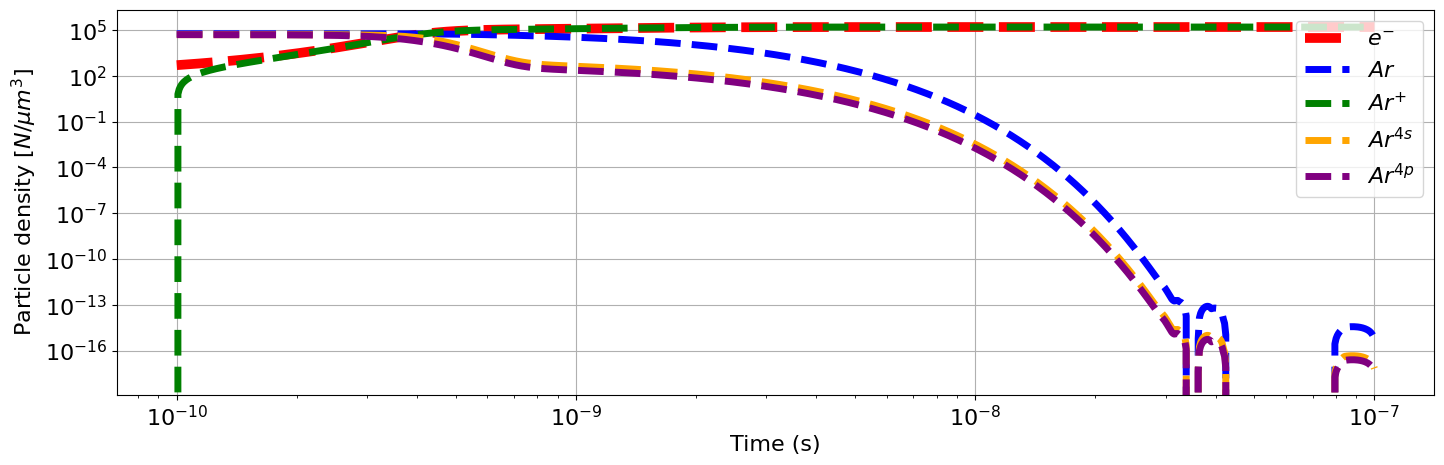

In [12]:
### Set simulation parameters... ###

Nt   = 1000 # Number of temporal grid points.
tVec = np.logspace(-10.0, -7.0, Nt) # Temporal grid.
X0   = [500.0, 56870.0, 0.0, 50000.0, 50000.0] # Initial conditions.

[ce, cAr, cArp, cAr4s, cAr4p] = ODE_solution_numerical(X0, [ki_gs, ki_4s, ki_4p, kef_4s, keb_4s, kef_4p, keb_4p, kef_4s4p, keb_4s4p], tVec)

plt.figure(figsize=(17,5))
plt.semilogx(tVec, ce,'--', color = 'red', label='$e^{-}$', lw = 7.0)
plt.semilogx(tVec, cAr, '--', color = 'blue' , label='$Ar$', lw = 5.0)
plt.semilogx(tVec, cArp, '--', color = 'green' , label='$Ar^{+}$', lw = 5.0)
plt.semilogx(tVec, cAr4s, '--', color = 'orange' , label='$Ar^{4s}$', lw = 5.0)
plt.semilogx(tVec, cAr4p, '--', color = 'purple' , label='$Ar^{4p}$', lw = 5.0)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Particle density [$N/\mu m^{3}$]', fontsize = 16)
plt.legend(loc='upper right', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.yscale('log')

In [13]:
# Print out the nominal rate constants.
[ki_gs, ki_4s, ki_4p, kef_4s, keb_4s, kef_4p, keb_4p, kef_4s4p, keb_4s4p]

[5658.4423419140085,
 99933.70494669965,
 254092.2600546911,
 1863.6464357181758,
 3604.091298385688,
 1015.0785758712901,
 3654.5935936292476,
 186677.52359815087,
 243729.27122693218]

In [14]:
import pyDOE
import pandas as pd

In [15]:
OutputDir      = WORKSPACE_PATH + '/ROMNet/Data/PlasmaSyst_500Cases/'

species_names  = ['e','Ar','Ar+','Ar4s','Ar4p']
n_ics_train    = 10
n_ics_test     = 2
X0             = np.array([500.0, 56870.0, 1.e-10, 50000.0, 50000.0])
MinVals        = np.log10(X0 / 2)
MaxVals        = np.log10(X0 * 2)

params_names   = 'ki_gs', 'ki_4s', 'ki_4p', 'kef_4s', 'keb_4s', 'kef_4p', 'keb_4p', 'kef_4s4p', 'keb_4s4p'
n_samples_train= 10
n_samples_test = 2
ParamsVec      = np.array([ki_gs, ki_4s, ki_4p, kef_4s, keb_4s, kef_4p, keb_4p, kef_4s4p, keb_4s4p])
ParamsMinVals  = np.log10(ParamsVec / 2)
ParamsMaxVals  = np.log10(ParamsVec * 2)

In [16]:
try:
    os.makedirs(OutputDir)
except:
    pass
# try:
#     os.makedirs(FigDir)
# except:
#     pass
try:
    os.makedirs(OutputDir+'/Orig/')
except:
    pass

In [17]:
DirName = 'train'

try:
    os.makedirs(OutputDir+'/Orig/'+DirName+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/Orig/'+DirName+'/ext/')
except:
    pass

FileName = OutputDir+'/Orig/'+DirName+'/ext/CleanVars.csv'
StrSep   = ','
with open(FileName, 'w') as the_file:
    the_file.write(StrSep.join(species_names)+'\n')
    
FileName = OutputDir+'/Orig/'+DirName+'/ext/ParamNames.csv'
StrSep   = ','
with open(FileName, 'w') as the_file:
    the_file.write(StrSep.join(params_names)+'\n')

In [18]:
NDims      = len(X0)
ICs        = pyDOE.lhs(NDims, samples=n_ics_train, criterion='center')
for i in range(NDims):
    ICs[:,i] = ICs[:,i] * (MaxVals[i] - MinVals[i]) + MinVals[i]
    ICs[:,i] = 10.**(ICs[:,i])
    
FileName = OutputDir+'/Orig/'+DirName+'/ext/ICs.csv'
DF       = pd.DataFrame(ICs, columns=species_names)
DF.to_csv(FileName, index=False)


if (n_samples_train > 0):
    NParams    = len(ParamsVec)
    Params     = pyDOE.lhs(NParams, samples=(n_samples_train-1), criterion='center')
    for i in range(NParams):
        Params[:,i] = Params[:,i] * (ParamsMaxVals[i] - ParamsMinVals[i]) + ParamsMinVals[i]
        Params[:,i] = 10.**(Params[:,i])
    Params     = np.concatenate([ParamsVec[np.newaxis,...], Params], axis=0)
else:
    Params     = ParamsVec[np.newaxis,...]
    
FileName = OutputDir+'/Orig/'+DirName+'/ext/Params.csv'
DF       = pd.DataFrame(Params, columns=params_names)
DF.to_csv(FileName, index=False)

In [19]:
iVar    = 1

#plt.figure(figsize=(17,5))
i       = 0
for iIC in range(n_ics_train):
    X0 = ICs[iIC,:]
    for iSample in range(n_samples_train):
        
        ParamsVec = Params[iSample,:]
        
        X         = ODE_solution_numerical(X0, ParamsVec, tVec)
    
        #plt.semilogx(tVec, X[iVar], '--', color = 'red', label='$e^{-}$', lw = 7.0)
        
        XX        = X.T/np.sum(X.T,axis=1, keepdims=True)
        ParamsMat = np.tile(ParamsVec, (X.shape[1],1))
        FileName  = OutputDir+'/Orig/'+DirName+'/ext/y.csv.'+str(i+1)
        DF        = pd.DataFrame(np.concatenate([tVec[...,np.newaxis], XX, ParamsMat], axis=1), columns=['t']+species_names+list(params_names))
        DF.to_csv(FileName, index=False)
        
        i += 1
    
# plt.xlabel('Time (s)', fontsize = 16)
# plt.ylabel('Particle density [$N/\mu m^{3}$]', fontsize = 16)
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.grid()
# plt.yscale('log')

In [20]:
DirName = 'test'

try:
    os.makedirs(OutputDir+'/Orig/'+DirName+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/Orig/'+DirName+'/ext/')
except:
    pass

FileName = OutputDir+'/Orig/'+DirName+'/ext/CleanVars.csv'
StrSep   = ','
with open(FileName, 'w') as the_file:
    the_file.write(StrSep.join(species_names)+'\n')

In [21]:
NDims      = len(X0)
ICs        = pyDOE.lhs(NDims, samples=n_ics_train, criterion='center')
for i in range(NDims):
    ICs[:,i] = ICs[:,i] * (MaxVals[i] - MinVals[i]) + MinVals[i]
    ICs[:,i] = 10.**(ICs[:,i])
    
FileName = OutputDir+'/Orig/'+DirName+'/ext/ICs.csv'
DF       = pd.DataFrame(ICs, columns=species_names)
DF.to_csv(FileName, index=False)


if (n_samples_test > 0):
    NParams    = len(ParamsVec)
    Params     = pyDOE.lhs(NParams, samples=(n_samples_train-1), criterion='center')
    for i in range(NParams):
        Params[:,i] = Params[:,i] * (ParamsMaxVals[i] - ParamsMinVals[i]) + ParamsMinVals[i]
        Params[:,i] = 10.**(Params[:,i])
    Params     = np.concatenate([ParamsVec[np.newaxis,...], Params], axis=0)
else:
    Params     = ParamsVec[np.newaxis,...]
    
FileName = OutputDir+'/Orig/'+DirName+'/ext/Params.csv'
DF       = pd.DataFrame(Params, columns=params_names)
DF.to_csv(FileName, index=False)

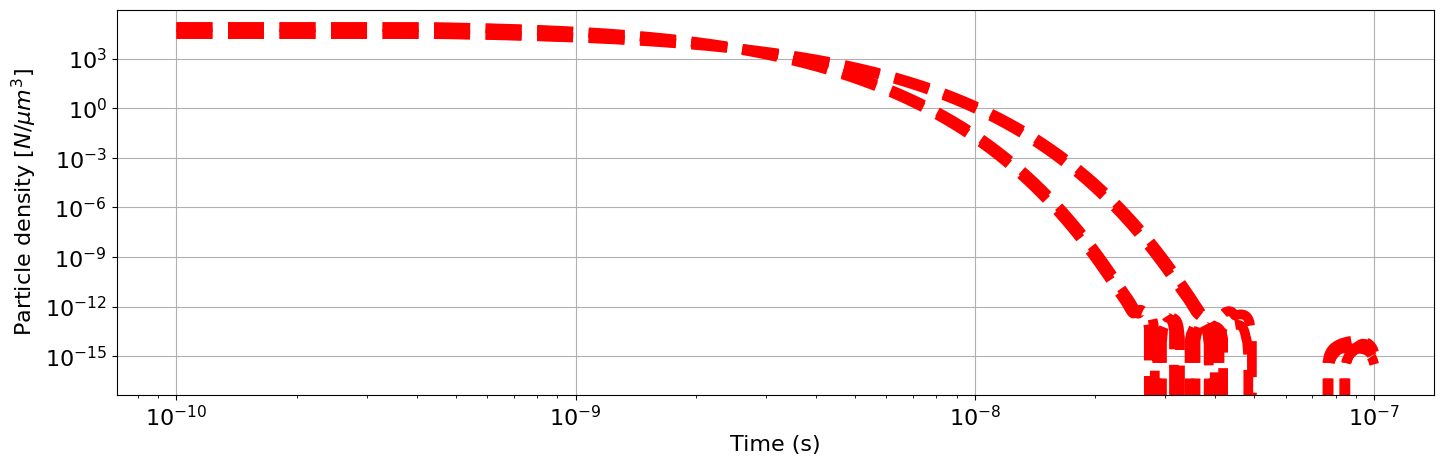

In [22]:
iVar    = 1

plt.figure(figsize=(17,5))
i       = 0
for iIC in range(n_ics_test):
    X0 = ICs[iIC,:]
    for iSample in range(n_samples_test):
        
        ParamsVec = Params[iSample,:]
        
        X         = ODE_solution_numerical(X0, ParamsVec, tVec)
        
        plt.semilogx(tVec, X[iVar], '--', color = 'red', label='$e^{-}$', lw = 7.0)
    
        XX        = X.T/np.sum(X.T,axis=1, keepdims=True)
        ParamsMat = np.tile(ParamsVec, (X.shape[1],1))
        FileName  = OutputDir+'/Orig/'+DirName+'/ext/y.csv.'+str(i+1)
        DF        = pd.DataFrame(np.concatenate([tVec[...,np.newaxis], XX, ParamsMat], axis=1), columns=['t']+species_names+list(params_names))
        DF.to_csv(FileName, index=False)
        
        i += 1
    
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Particle density [$N/\mu m^{3}$]', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.yscale('log')